### [ 데이터 기반 시각화 ]
- 데이터 : 남북한발전전력.xlsx
- 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# data prepare
file = '../DATA/남북한발전전력량.xlsx'

실제 데이터 파일 확인 결과
* 첫 번째 행은 컬럼명 데이터
* 첫 번째와 두 번째 컬럼을 행 인덱스 사용으로 적합
* 입력값인 없는 쉘에 '-' 채워져 있음 => isnull()/.isna()로는 결측치 체크 X
    * 삭제하지 않고 대체로 처리 => 대체값 0

<hr>

In [5]:
# 3. 데이터 저장 : Excel => DF
korpowerDF = pd.read_excel(file, index_col=[0,1])

<hr>

In [6]:
# 4. 데이터 확인
# 4-1. 데이터 타입과 실제 데이터 비교
#   - '-' -> 0
#   - object -> uint16
korpowerDF.info(), korpowerDF.index, korpowerDF.columns

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1991    9 non-null      object
 2   1992    9 non-null      object
 3   1993    9 non-null      object
 4   1994    9 non-null      object
 5   1995    9 non-null      object
 6   1996    9 non-null      object
 7   1997    9 non-null      object
 8   1998    9 non-null      object
 9   1999    9 non-null      object
 10  2000    9 non-null      object
 11  2001    9 non-null      object
 12  2002    9 non-null      object
 13  2003    9 non-null      object
 14  2004    9 non-null      object
 15  2005    9 non-null      object
 16  2006    9 non-null      object
 17  2007    9 non-null      object
 18  2008    9 non-null      object
 19  2009    9 non-null      object
 20  2010    9 non-null      object
 21  2011    9 non-null      object
 22  2012   

(None,
 MultiIndex([('남한',  '합계'),
             ('남한',  '수력'),
             ('남한',  '화력'),
             ('남한', '원자력'),
             ('남한', '신재생'),
             ('북한',  '합계'),
             ('북한',  '수력'),
             ('북한',  '화력'),
             ('북한', '원자력')],
            names=['전력량 (억㎾h)', '발전 전력별']),
 Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
        '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
        '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
       dtype='object'))

<hr>

In [7]:
# 5. 데이터 전처리

# 5.1 데이터 자료형 변환
# 모든 컬럼의 타입이 같아 한 번에 처리 가능!
# '-' -> 0
korpowerDF_Replaced = korpowerDF.replace('-', 0)
# obj -> uint16
korpowerDF_Replaced.astype('uint16')
korpowerDF_Replaced.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int64
 1   1991    9 non-null      int64
 2   1992    9 non-null      int64
 3   1993    9 non-null      int64
 4   1994    9 non-null      int64
 5   1995    9 non-null      int64
 6   1996    9 non-null      int64
 7   1997    9 non-null      int64
 8   1998    9 non-null      int64
 9   1999    9 non-null      int64
 10  2000    9 non-null      int64
 11  2001    9 non-null      int64
 12  2002    9 non-null      int64
 13  2003    9 non-null      int64
 14  2004    9 non-null      int64
 15  2005    9 non-null      int64
 16  2006    9 non-null      int64
 17  2007    9 non-null      int64
 18  2008    9 non-null      int64
 19  2009    9 non-null      int64
 20  2010    9 non-null      int64
 21  2011    9 non-null      int64
 22  2012    9 non-null      int64
 

<hr>

In [8]:
# 6. 데이터 분석 작업

# 남북한의 수력발전량 비교하기
# .xs() 사용
waterDF = korpowerDF_Replaced.xs('수력', level=1)
waterDF.shape  # (2, 27) : 남한, 북한 두 가지의 인덱스만 남음

(2, 27)

In [9]:
waterDF

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
전력량 (억㎾h),,,,,,,,,,,,,,,,,,,,,
남한,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
북한,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128


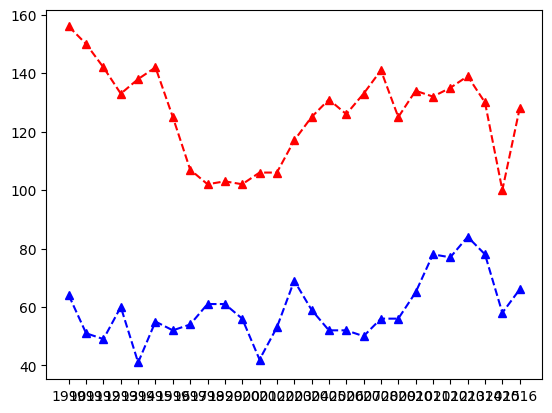

In [10]:
# 7. 이 자료로 그래프 그리기
x = [x for x in waterDF.columns]
y = [ waterDF[i]['남한'] for i in x]
y2 = [ waterDF[i]['북한'] for i in x]
plt.plot(x,y, 'b^--', x,y2, 'r^--')

##### [ 그래프 다듬기 ]
1. 제목 설정 

In [11]:
# 1.1 폰트 파일의 경로 저장
import matplotlib as mpl        # 패키지 관련
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/gulim.ttc'

# 1.2 matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont) 

In [12]:
# 함수 제작
def makeCompareGraph(DF, title, category, legend):
    # ------------- figure ------------------
    plt.figure(figsize=(10,5))

    # ------------ 함수 담기 ------------------
    DF = korpowerDF_Replaced.xs(category, level=1)
    x = [x for x in waterDF.columns]
    y = [ waterDF[i][legend[0]] for i in x]
    y2 = [ waterDF[i][legend[1]] for i in x]
    plt.plot(x,y, 'b^--', x,y2, 'r^--')

    # ------------ 제목 설정 ------------------
    plt.title(title)

    # ------------ 축 다듬기 ------------------
    plt.xlabel('조사 연도', loc='center', fontsize='large')
    plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

    # ------------ 범례 설정 -------------------
    plt.legend(legend)

    # ------------ 눈금 설정 -------------------
    maxValue = max([max(DF[i]) for i in DF.columns])

    plt.xticks(ticks=[i for i in range(0, 30, 5)])
    plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

    # ------------ 격자 설정 -------------------
    plt.grid(True, lw =1, ls ='--', c='.8')


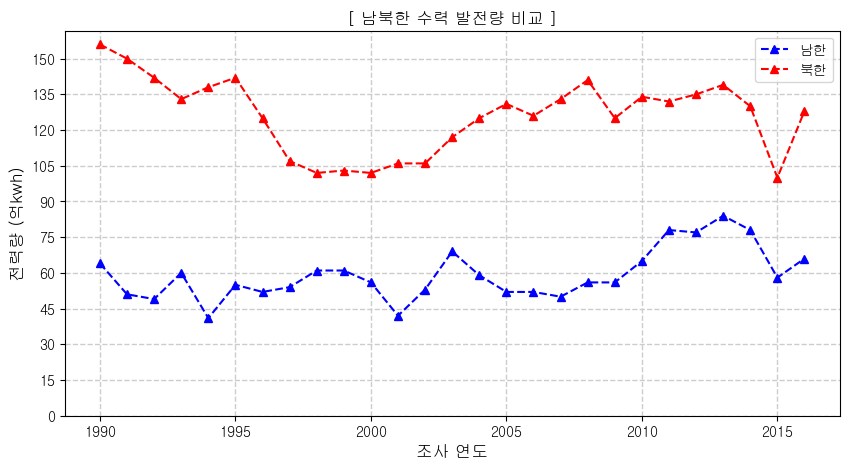

In [13]:
# 남북한 수력 발전 비교

# ------------- figure ------------------
plt.figure(figsize=(10,5))

# ------------ 함수 담기 ------------------
waterDF = korpowerDF_Replaced.xs('수력', level=1)
x = [x for x in waterDF.columns]
y = [ waterDF[i]['남한'] for i in x]
y2 = [ waterDF[i]['북한'] for i in x]
plt.plot(x,y, 'b^--', x,y2, 'r^--')

# ------------ 제목 설정 ------------------
plt.title("[ 남북한 수력 발전량 비교 ]")

# ------------ 축 다듬기 ------------------
plt.xlabel('조사 연도', loc='center', fontsize='large')
plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

# ------------ 범례 설정 -------------------
plt.legend(['남한', '북한'])

# ------------ 눈금 설정 -------------------
maxValue = max([max(waterDF[i]) for i in waterDF.columns])

plt.xticks(ticks=[i for i in range(0, 30, 5)])
plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

# ------------ 격자 설정 -------------------
plt.grid(True, lw =1, ls ='--', c='.8')

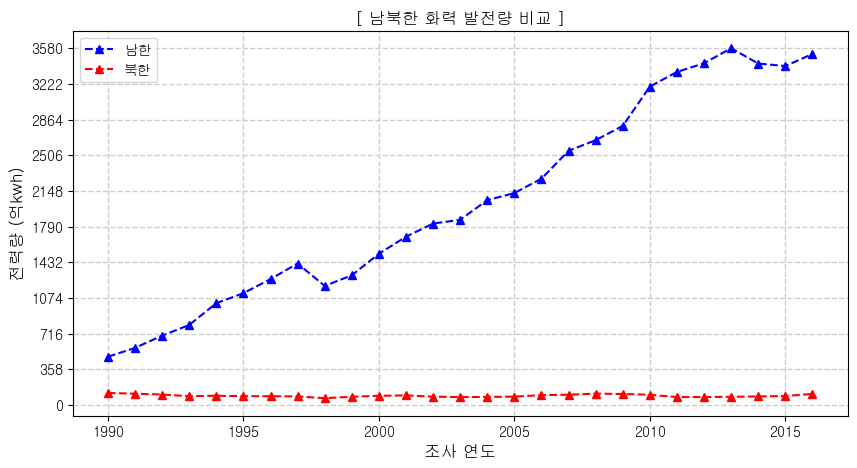

In [14]:
# 남북한 화력 발전 비교

# ------------- figure ------------------
plt.figure(figsize=(10,5))

# ------------ 함수 담기 ------------------
fossilDF = korpowerDF_Replaced.xs('화력', level=1)
x = [x for x in fossilDF.columns]
y = [ fossilDF[i]['남한'] for i in x]
y2 = [ fossilDF[i]['북한'] for i in x]
plt.plot(x,y, 'b^--', x,y2, 'r^--')

# ------------ 제목 설정 ------------------
plt.title("[ 남북한 화력 발전량 비교 ]")

# ------------ 축 다듬기 ------------------
plt.xlabel('조사 연도', loc='center', fontsize='large')
plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

# ------------ 범례 설정 -------------------
plt.legend(['남한', '북한'])

# ------------ 눈금 설정 -------------------
maxValue = max([max(fossilDF[i]) for i in fossilDF.columns])

plt.xticks(ticks=[i for i in range(0, 30, 5)])
plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

# ------------ 격자 설정 -------------------
plt.grid(True, lw =1, ls ='--', c='.8')

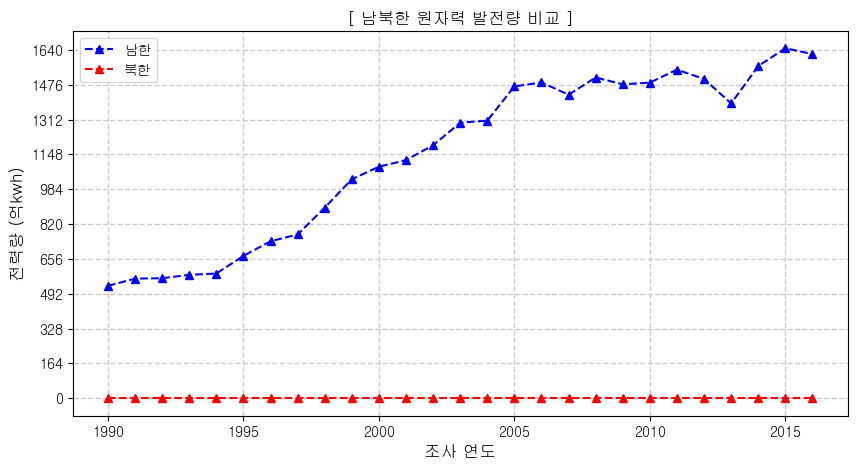

In [15]:
# 남북한 원자력 발전 비교

# ------------- figure ------------------
plt.figure(figsize=(10,5))

# ------------ 함수 담기 ------------------
NuclearDF = korpowerDF_Replaced.xs('원자력', level=1)
x = [x for x in NuclearDF.columns]
y = [NuclearDF[i]['남한'] for i in x]
y2 = [NuclearDF[i]['북한'] for i in x]
plt.plot(x,y, 'b^--', x,y2, 'r^--')

# ------------ 제목 설정 ------------------
plt.title("[ 남북한 원자력 발전량 비교 ]")

# ------------ 축 다듬기 ------------------
plt.xlabel('조사 연도', loc='center', fontsize='large')
plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

# ------------ 범례 설정 -------------------
plt.legend(['남한', '북한'])

# ------------ 눈금 설정 -------------------
maxValue = max([max(NuclearDF[i]) for i in NuclearDF.columns])

plt.xticks(ticks=[i for i in range(0, 30, 5)])
plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

# ------------ 격자 설정 -------------------
plt.grid(True, lw =1, ls ='--', c='.8')

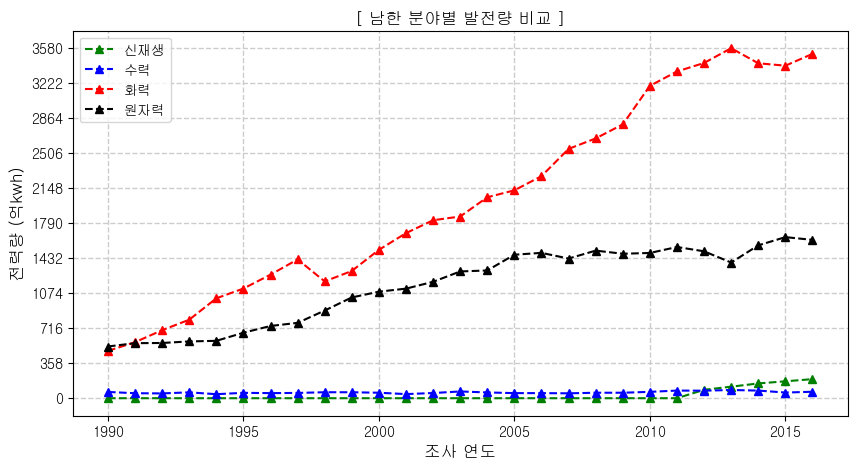

In [16]:
# 남한 분야별 발전량 비교

# ------------- figure ------------------
plt.figure(figsize=(10,5))

# ------------ 함수 담기 ------------------
southDF = korpowerDF_Replaced.loc['남한']
x = [x for x in southDF.columns]
y1 = [ southDF[i]['신재생'] for i in x]
y2 = [ southDF[i]['수력'] for i in x]
y3 = [ southDF[i]['화력'] for i in x]
y4 = [ southDF[i]['원자력'] for i in x]
plt.plot(x,y1, 'g^--', x,y2, 'b^--',x,y3, 'r^--',x,y4, 'k^--')

# ------------ 제목 설정 ------------------
plt.title("[ 남한 분야별 발전량 비교 ]")

# ------------ 축 다듬기 ------------------
plt.xlabel('조사 연도', loc='center', fontsize='large')
plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

# ------------ 범례 설정 -------------------
plt.legend(['신재생', '수력', '화력', '원자력'], loc='upper left')

# ------------ 눈금 설정 -------------------
southDF_max = southDF.drop(labels='합계', axis='index')
maxValue = max([max(southDF_max[i]) for i in southDF_max.columns])

plt.xticks(ticks=[i for i in range(0, 30, 5)])
plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

# ------------ 격자 설정 -------------------
plt.grid(True, lw =1, ls ='--', c='.8')

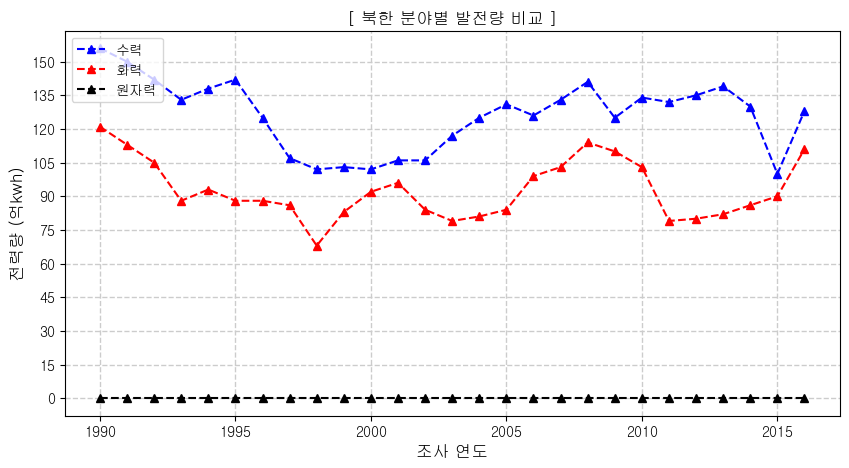

In [17]:
# 북한 분야별 발전량 비교

# ------------- figure ------------------
plt.figure(figsize=(10,5))

# ------------ 함수 담기 ------------------
northDF = korpowerDF_Replaced.loc['북한']
x = [x for x in northDF.columns]
y2 = [ northDF[i]['수력'] for i in x]
y3 = [ northDF[i]['화력'] for i in x]
y4 = [ northDF[i]['원자력'] for i in x]
plt.plot(x,y2, 'b^--',x,y3, 'r^--',x,y4, 'k^--')

# ------------ 제목 설정 ------------------
plt.title("[ 북한 분야별 발전량 비교 ]")

# ------------ 축 다듬기 ------------------
plt.xlabel('조사 연도', loc='center', fontsize='large')
plt.ylabel('전력량 (억kwh)', loc='center', fontsize='large')

# ------------ 범례 설정 -------------------
plt.legend(['수력', '화력', '원자력'], loc='upper left')

# ------------ 눈금 설정 -------------------
northDF_max = northDF.drop(labels='합계', axis='index')
maxValue = max([max(northDF_max[i]) for i in northDF_max.columns])

plt.xticks(ticks=[i for i in range(0, 30, 5)])
plt.yticks(ticks=[i for i in range(0, maxValue, maxValue//10)])

# ------------ 격자 설정 -------------------
plt.grid(True, lw =1, ls ='--', c='.8')